In [5]:
from sqlalchemy import create_engine
import pandas as pd
from trainline_traffic_counter_mapping import train_counter_mapping

traffic_counters = train_counter_mapping.get('RB 84: Kiel - Lübeck')
print(traffic_counters)

engines = []
for traffic_counter in traffic_counters:
    engines.append(create_engine('sqlite:///../../data/traffic_counter_' + str(traffic_counter) + '_hourly.sqlite'))



[1194, 1104, 1106, 1165, 1166, 1164, 1170, 1108, 1135, 1156, 1149]


In [6]:
import numpy as np

def calc_weekday_variances(weekday_values: list):
    print('calc_weekday_variances():', weekday_values)
    # Calc variances for 7 weekdays
    weekday_variances = [0] * 7
    for i in range(7):
        # print(i, len(weekday_values))
        # weekday_mean = sum(weekday_values[i]) / len(weekday_values[i])
        # print('weekday_mean =', weekday_mean)
        # # var = o**2 = sum((p_i - mean)**2) / num_values
        # weekday_var = sum([(p-weekday_mean)**2 for p in weekday_values[i]]) / len(weekday_values[i])
        # # weekday_var = sum([abs(p-weekday_mean) for p in weekday_values[i]]) / len(weekday_values[i])
        
        # weekday_variances[i] = np.var(weekday_values[i], ddof=1)
        weekday_variances[i] = np.std(weekday_values[i], ddof=1)

    print('variances:', weekday_variances)
    return weekday_variances


df = pd.read_sql_table(str(2012), engines[0])

monthly_weekday_variances = []
weekday_values = []
for i in range(7):
    weekday_values.append([])

cur_day_values = []
last_p_day = 1
last_p_weekday = df.loc[0, 'weekday']
last_p_month = df.loc[0, 'timestamp'].month


for i in range(len(df)):
    p_datetime = df.loc[i, 'timestamp']
    p_month = p_datetime.month
    p_weekday = df.loc[i, 'weekday']
    p_day = p_datetime.day
    
    if p_month != last_p_month:
        weekday_variances = calc_weekday_variances(weekday_values)
        monthly_weekday_variances.append(weekday_variances)
        weekday_values.clear()
        for i in range(7):
            weekday_values.append([])
            
    if p_day != last_p_day:
        daily_sum = sum(cur_day_values)
        # print('len values:', len(day_values), 'values:', day_values, 'sum:', daily_sum)
        # Fix missing values
        missing_values = 24 - len(cur_day_values)
        if missing_values > 0:
            daily_sum += (daily_sum / len(cur_day_values)) *missing_values
            print('Fixed missing daily values for', p_datetime)
        
        weekday_values[last_p_weekday-1].append(daily_sum)
        cur_day_values.clear()
    
    p_cars_cnt = 0
    p_cars_cnt += df.loc[i, 'car_dir1_cnt']
    # p_cars_cnt += df.loc[i, 'car_dir2_cnt']
    
    cur_day_values.append(p_cars_cnt)
    
    last_p_month   = p_month
    last_p_day     = p_day
    last_p_weekday = p_weekday
    


daily_sum = sum(cur_day_values)
weekday_values[last_p_weekday-1].append(daily_sum)

# Push last month
weekday_vars_last_month = calc_weekday_variances(weekday_values)
monthly_weekday_variances.append(weekday_vars_last_month)
    

calc_weekday_variances(): [[49232, 57943, 59278, 59322, 58835], [50144, 59263, 59912, 59414], [52681, 59283, 60745, 59195], [52861, 59782, 60684, 61432], [58047, 63441, 64062, 60043], [40467, 45023, 41730, 42384], [24699, 31652, 34018, 33465, 34979]]
variances: [4334.421703064897, 4701.018426894326, 3600.860823007002, 3943.9533782741396, 2848.155587393357, 1920.5702278229764, 4130.281503723445]
calc_weekday_variances(): [[58400, 57733, 59271, 58912], [59769, 58991, 59960, 58775, 59639], [58569, 58569, 60427, 61541], [59274, 60481, 60953, 60336], [58103, 61713, 63685, 63391], [40830, 43025, 43978, 44590], [31184, 31809, 35377, 35354]]
variances: [667.7100168985536, 515.0720337972156, 1466.5973089661206, 708.7684153986171, 2564.902077403086, 1648.1683520401266, 2248.3132937085675]
calc_weekday_variances(): [[59526, 61041, 60734, 60249], [60039, 60574, 60664, 60862], [61223, 60996, 60955, 61142, 63344], [61223, 61833, 62188, 62587, 63736], [63698, 64073, 64640, 63873, 63657], [47123, 4709

[[4334.421703064897, 4701.018426894326, 3600.860823007002, 3943.9533782741396, 2848.155587393357, 1920.5702278229764, 4130.281503723445], [667.7100168985536, 515.0720337972156, 1466.5973089661206, 708.7684153986171, 2564.902077403086, 1648.1683520401266, 2248.3132937085675], [660.4263774259778, 351.71330654383837, 1018.7185577970001, 939.9639886719066, 399.75454969268327, 2135.4485087056846, 2312.0477756021105], [12616.188922042451, 1836.9294125432982, 2032.68416549809, 2081.041486051315, 15924.170695308856, 2942.9166315069137, 1394.7780468590693], [8345.132671204216, 10746.332988512871, 2858.4654449546874, 14674.892322148966, 7948.140621134816, 2295.053521525515, 2136.17953365348], [857.1291229058393, 1974.6922967051516, 2464.6205083136024, 2364.6126109788047, 2726.458912215623, 3516.5674551566144, 3222.015970889447], [1313.3523137376353, 1720.1144099545627, 1116.586912574804, 1175.7228627529535, 827.173903521301, 1643.5165651735915, 522.5004306218322], [450.3971395705498, 865.4289687

<Figure size 1200x600 with 0 Axes>

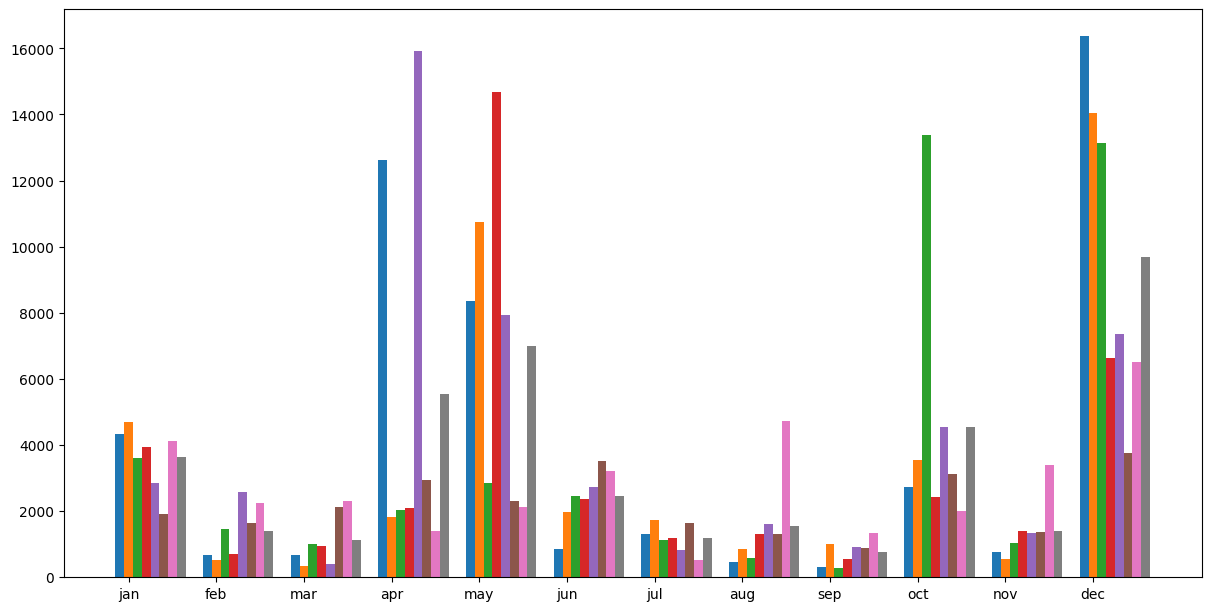

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# From https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
months = ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')
weekday_variances = {'mo': [], 'tu': [], 'we': [], 'th':[], 'fr':[], 'sa':[], 'su':[], 'avg': []}
# for day in range(len(weekday_variances)):
for m in range(len(monthly_weekday_variances)):
    weekday_variances['mo'].append(monthly_weekday_variances[m][0])
    weekday_variances['tu'].append(monthly_weekday_variances[m][1])
    weekday_variances['we'].append(monthly_weekday_variances[m][2])
    weekday_variances['th'].append(monthly_weekday_variances[m][3])
    weekday_variances['fr'].append(monthly_weekday_variances[m][4])
    weekday_variances['sa'].append(monthly_weekday_variances[m][5])
    weekday_variances['su'].append(monthly_weekday_variances[m][6])
    avg = sum(monthly_weekday_variances[m]) / len(monthly_weekday_variances[m])
    weekday_variances['avg'].append(avg)
    
print(monthly_weekday_variances)
    
x = np.arange(len(months))
mult = 0

plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(layout='constrained', figsize=(12, 6))

for weekday, variance in weekday_variances.items():
    width = 0.1
    off = width * mult
    rects = ax.bar(x + off, variance, width, label=weekday)
    # ax.bar_label(rects)
    mult += 1
    
ax.set_xticks(x + width, months)

plt.show()
